# CO2 Equilibria

## 1 - Atm. pressure (func. of altitude)

$dp = -\rho g dz$

${{dp}\over{dz}} = -\rho g = -{{\rho_0}\over{p_0}} g p 
\text{  ..    Boyle-Mariotte i.g. }p/p_0 = \rho/\rho_0$

${{1}\over{p}}{{dp}\over{dz}} = -{{1}\over{p_0/(\rho_0\times g)}} 
\equiv -{{1}\over{H}} [=] 1/m \text{...(Skalenhöhe)}$

$\int{{{1}\over{p}}dp} = \int{-{{1}\over{H}}dz}$

$ln(p) + c1 = -z/H$

$p(z) = e^{c1} e^{-z/H}$

$p(0) = p_0 \rightarrow p(0) = e^{c1}e^0 = e^{c1} = p_0$

$p(z) = p_0 e^{-z/H}$

=============================================

Hg: $p=\rho g z$

$z=760mm=0.760m, \rho=13,595.098kg/m^3, g=9.80665m/s^2 \rightarrow p=p_0=101325Pa$


N2/O2/Ar: $p=p_0 e^{-z/H}$

$p/p_0 = 1 \rightarrow 0 = -z/H$

$\lim_{p\rightarrow 0}{p/p_0} = +\inf$

delta_z=8.8 km
p_0=101325 Pa
H = 8.8 km
99.9999% of atmosphere weight: 122.2 km


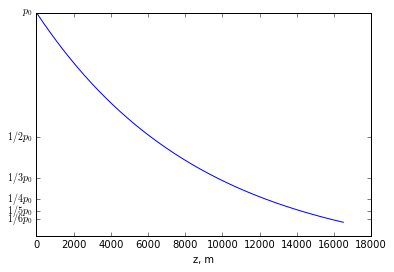

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.constants import *
def interp_1(x3, x_1_2, y_1_2):
    x1, x2, y1, y2 = x_1_2[0], x_1_2[1], y_1_2[0], y_1_2[0]
    return (y2-y1)/(x2-x1)*(x3-x2) + y2

comps = np.array(['N2', 'O2', 'Ar'])
mol_pct = np.array([0.7812, 0.2096, 0.0092])
mm = np.array([28.013, 31.999, 39.948])
w_pct = np.multiply(mol_pct, mm)/sum(np.multiply(mol_pct, mm))
# 1dm^3 = 1dm^3*(1m/10dm)^3*(100cm/m)^3*(1mL/cm^3) = 10^3mL = 1L
# 0.1MPa, 300K
dens_moldm3 = 1/np.array([24.854, 24.928, 24.928]) # mol/dm^3
dens_gml = np.multiply(mm, dens_moldm3)/1000.0 # g/mL, kg/L
dens_kgm3 = 1000.0*dens_gml # kg/m^3
rho_hg = 13.596*interp_1(293.15, [294, 292], [997.983, 998.392]) # kg/m3
rho_a = sum(w_pct*dens_kgm3) # kg/m^3
delta_z = rho_hg/rho_a*760.0/1000.0
print 'delta_z=' + '%.1f' %  (delta_z/1000.0) + ' km'
print 'p_0=' + '%g' % (rho_hg*g*761.4855/1000.0) + ' Pa' # kg/m^3*m/s^2*m [=] (kg m/s^2)/m^2 [=] Pa
z = np.array(range(0,16500))
p_0 = 101325.0 
H = p_0/(g*rho_a)
print 'H = ' + '%.1f' % (H/1000.0) + ' km'
a = plt.plot(z,1.0*np.exp(-z/H))
plt.xlabel('z, m')
plt.yticks([1/float(x) for x in range(1,7,1)], ['$p_0$'] + ['$1/' + str(x) + 'p_0$' for x in range(2,7,1)]);
print '99.9999% of atmosphere weight: ' + '%.1f' % (np.log(0.1/101325.0)*-H/1000.0) + ' km'

## 2 - CO2 absorption
### (Henley 3.10)

air pressure at the top:


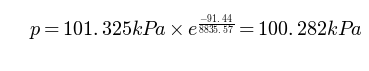

p to lift water:


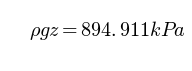

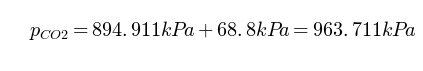

Henry's law application:


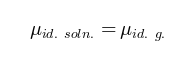

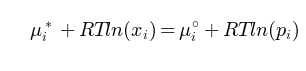

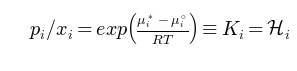

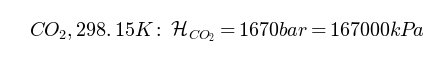

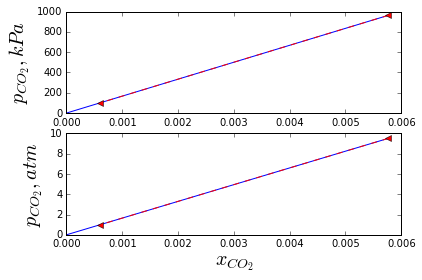

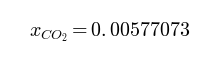

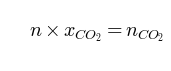

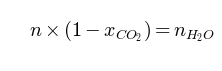

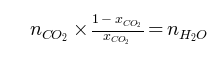

total CO2 to absorb


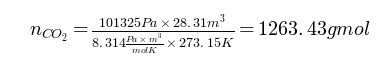

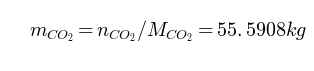

water to absorb calc.kg of CO2 


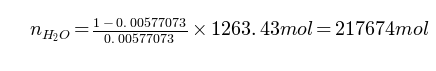

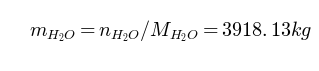

Actual balance to account for pressure difference: 


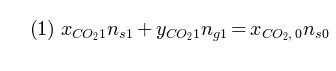

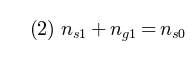

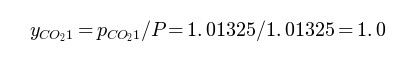

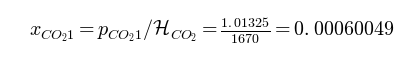

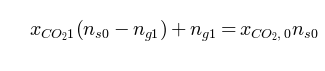

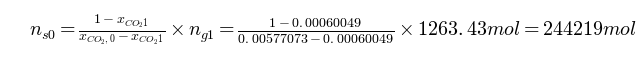

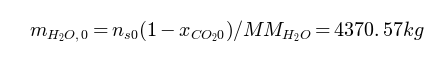

In [2]:
def print_latex(str_x):
    ax = plt.axes([0,0,0.1,0.2])
    plt.cla()
    plt.text(0.5, 0.5, '$%s$'%str_x, size=20)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(0)
    plt.show()

z = 91.44 # m
p_at_top = 101.325*np.exp(-z/H) # kPa
rho_w = interp_1(293.15, [294, 292], [997.983, 998.392]) # kg/m^3
delta_p = rho_w * g * z # kg/m^3*m/s^2*m [=] (kg m/s^2)/m^2 [=] Pa

print 'air pressure at the top:'
print_latex('p = 101.325kPa\\times e^{\\frac{-91.44}{%g' % H + \
            '}} = %g' % p_at_top + 'kPa')
print 'p to lift water:'
print_latex('\\rho g z = ' + '%g' % (delta_p/1000.0) + ' kPa')
print_latex('p_{CO2} = '    + '%g' % (delta_p/1000.0)  + 'kPa + 68.8kPa = ' \
                            + '%g' % (delta_p/1000.0 + 68.8) + 'kPa')
print "Henry's law application:"
print_latex('\\mu_{id.\ soln.}=\\mu_{id.\ g.}')
print_latex('\\mu_i^* + RTln(x_i) = \mu_i^{\\circ} + RTln(p_i)')
print_latex('p_i/x_i = exp \\left(\\frac{\\mu_i^*-\\mu_i^{\\circ}}{RT} \\right) \\equiv K_i = \\mathcal{H}_i')
print_latex('CO_2, 298.15K: \ \\mathcal{H}_{CO_2} = 1670bar = 167000kPa')
p_co2 = delta_p/1000.0 + 68.8 # kPa
h_co2 = 167000.0 # 1670.0bar = 167000.0 kPa
#h_co2 = 1666.6666666666667*100 # correct for exercise
x_co2_max = p_co2/h_co2
x_co2 = np.arange(0.0,x_co2_max*(1+1/20.0),x_co2_max/20.0)
n_co2 = 101325.0*1000.0*(1/3.280839895013123)**3/(8.314*273.15) # 28.31m^3 (STP)
mm_co2 = 12+2*16
mm_h2o = 2*1 + 16
n_h2o = n_co2*(1-x_co2[-1])/x_co2[-1]
#n_h2o = n_co2*(1-0.0057)/0.0057
m_co2 = n_co2 * mm_co2 / 1000.0 # kg
m_h2o = n_h2o * mm_h2o / 1000.0 # kg
x1_co2 = p_at_top/100.0/1670.0
y1_co2 = 1.0
n_s0 = (1.0 - x1_co2)/(x_co2_max - x1_co2) * n_co2
m_h2o_0 = n_s0 * (1 - x_co2_max) * mm_h2o / 1000.0 # kg
ax = plt.axes([0.0,0.0,1.0,1.0])
plt.cla()
plt.subplot(211)
plt.plot(x_co2, h_co2 * x_co2)
plt.plot([x_co2[-1], x1_co2],
         [p_co2, p_at_top], 
         marker='<', color='r', linestyle='--' )
plt.xlabel('$x_{CO_2}$', size=20)
plt.ylabel('$p_{CO_2}, kPa$', size=20)
plt.subplot(212)
plt.plot(x_co2, h_co2 * x_co2 / 101.325)
plt.plot([x_co2[-1], x1_co2],
         [p_co2/101.325, p_at_top/101.325], 
         marker='<', color='r', linestyle='--' )
plt.xlabel('$x_{CO_2}$', size=20)
plt.ylabel('$p_{CO_2}, atm$', size=20)
plt.show()
print_latex('x_{CO_2} = ' + '%g' % x_co2[-1])
print_latex('n \\times x_{CO_2} = n_{CO_2}')
print_latex('n \\times (1-x_{CO_2}) = n_{H_2O}')
print_latex('n_{CO_2} \\times \\frac{1-x_{CO_2}}{x_{CO_2}} = n_{H_2O}')
print 'total CO2 to absorb'
print_latex('n_{CO_2} = \\frac{101325 Pa\\times 28.31m^3}' + \
            '{8.314\\frac{Pa \\times m^3}{mol K}\\times 273.15K} = ' + \
            '%g' % n_co2 + 'gmol') # n = PV/RT
print_latex('m_{CO_2} = n_{CO_2}/M_{CO_2} = ' + '%g' % m_co2 + 'kg')
print 'water to absorb calc.kg of CO2 '
print_latex('n_{H_2O} = \\frac{1-' + '%g' % x_co2[-1] + '}' + \
            '{' + '%g' % x_co2[-1] + '} \\times ' + '%g' % n_co2 + 'mol = '+ \
            '%g' % n_h2o + ' mol')
print_latex('m_{H_2O} = n_{H_2O}/M_{H_2O} = ' + '%g' % m_h2o + 'kg')
print 'Actual balance to account for pressure difference: '
print_latex('(1)\\ x_{CO_2 1} n_{s 1} + y_{CO_2 1} n_{g 1}  = x_{CO_2, 0} n_{s 0}')
print_latex('(2)\\ n_{s 1} + n_{g 1}  = n_{s 0}')
print_latex('y_{CO_2 1} = p_{CO_2 1}/P = 1.01325/1.01325 = 1.0')
print_latex('x_{CO_2 1} = p_{CO_2 1}/ \\mathcal{H}_{CO_2} ' + \
            '= \\frac{1.01325}{1670} = ' + '%g' % x1_co2)
print ''
print_latex('x_{CO_2 1} (n_{s 0}-n_{g 1}) + n_{g 1}  = x_{CO_2, 0} n_{s 0}')
print_latex('n_{s 0} = \\frac{1-x_{CO_2 1}}{x_{CO_2, 0}-x_{CO_2 1}}\\times n_{g 1}' + \
            '= \\frac{1-%g' % x1_co2 + '}{ %g' % x_co2_max + \
            '-%g' % x1_co2 + '}\\times %g' % n_co2 + 'mol' + '=%g' % n_s0 + 'mol')
print_latex('m_{H_2O, 0} = n_{s 0}(1-x_{CO_2 0})/MM_{H_2O} = %g' % m_h2o_0 + 'kg')

## 3 - Complete CO2 equilibria in ac. solution

### Aequilibria

$
\begin{array}{ccccccc}
(1) &\ CO_2(ac) & + H_2O & \rightleftharpoons & CO_2(g) & & \mathcal{H_1} = 1670bar  \\
(2) &\ CO_2(ac) & + H_2O & \rightleftharpoons & H_2CO_3  & &  pK_2 = 2.821023053\\
(3) &\ H_2CO_3 & + H_2O & \rightleftharpoons & HCO_3^{-} & + H_3O^{+} & pK_3 = 3.539912399\\
(4) &\ HCO_3^{-} & + H_2O & \rightleftharpoons & CO_3^{2-} & + H_3O^{+} & pK_4 = 10.32991986\\
(5) &\ 2 H_2O & & \rightleftharpoons & H_3O^{+} & + HO^{-} & pK_w = 13.99602524\\
(6) &\ NaHCO_3 & & \rightarrow & HCO_3^{-} & + Na^{+} & \\
\end{array}
$

### Reactor (Batch)

#### Case 1: Constant V
![constant V](./utils/V_const.png "Constant V")

#### Case 2: Constant P
![constant V](./utils/P_const.png "Constant P")

### Model

Material Balances (n)

$n_i = n_{0,i} + \sum_j{(\nu_{ij}\times \xi_i)}$

Equilibrium constant expressions ($n_r$)

$K_j(T) = \left [ \prod_i{(x_i)^{\nu_{ij}}} \right ]_{eq.}$

EOS (gas phase)

* Case 1, $V_g$ = const. $P = \sum_i{\frac{n_{i,g} RT}{V_g}} = \frac{RT}{V_g} \sum_i{n_{i,g}}$

 Fixed V, P increases dep. on $p_{CO_2}$

* Case 2, P = const. $V_g = \sum_i{\frac{n_{i,g} RT}{P}} = \frac{RT}{P} \sum_i{n_{i,g}}$
 
 Fixed P, V increases dep. on $p_{CO_2}$

 Inerts: $n_{N_2} = n_{N_2, 0};n_{O_2} = n_{O_2, 0}$
 
 $p_{N_2} = \frac{RT}{V_g}n_{N_2}=\frac{RT}{V_g}n_{N_2,0}
 =p_{N_2,0}\times V_{g0}/V_g$
 
 $p_{O_2} = \frac{RT}{V_g}n_{O_2}=\frac{RT}{V_g}n_{O_2,0}
 =p_{O_2,0}\times V_{g0}/V_g$
 
 Note: $p_{O_2}$ & $p_{N_2}$ are not constant; $n_{O_2}$ & $n_{N_2}$ are.
 
 $\begin{array}{cc}
 P = const = & p_{CO_2} + p_{N_2} + p_{O_2}\\
           = & p_{CO_2} + p_{N_2,0}V_{g0}/V_g + p_{O_2,0}V_{g0}/V_g\\
 \rightarrow V_g = & \left( \frac{p_{N_2,0} + p_{O_2,0}}{P - p_{CO_2}} \right) V_{g0}&  \\
 \end{array}$

Phase rule: *F* = 2 + (*N* - *R*) - *P* = 2 + (6 - 5) - 2 = 1 (fix T = 298.15K)

### Initial condition

0.1% NaHCO3 solution with pH 7.0 water

$xw_{Na^{(+)},0} + xw_{HCO3^{(-)},0} = 0.1\%$

$\frac{xw_{Na^{(+)},0}}{M_{Na^{(+)}}} = \frac{xw_{HCO3^{(-)},0}}{M_{HCO3^{(-)}}}$

$\Rightarrow xw_{Na^{(+)}, 0} = \frac{0.1\%}{1+44/23}=0.034328\%$

$\Rightarrow xw_{HCO3^{(-)}, 0} = \frac{0.1\%}{1+23/44}=0.065672\%$

$x_{Na^{(+)}, 0} = \frac{0.00034324/23}{0.000343284/23+0.000656716/44+0.999/18} = 0.000268778$

$x_{HCO3^{(-)}, 0} = \frac{0.000656716/44}{0.000343284/23+0.000656716/44+0.999/18} = 0.000268778$

$pH_0 = 13.99568/2 = 6.99784$

$x_i/c_i = x_0 M_0 / \rho_0$ ($x_0, M_0, \rho_0$, solvent)

Initial pH=13.99568/2 = 6.99784, mole fraction:

$x_{H_3O^{(+)},0} = \frac{c_{H_3O^{(+)},0}}{M_0 \rho_0}\times\left(1 - \sum_{i\neq 0}{x_i}\right) = \frac{c_{H_3O^{(+)},0}}{M_0 \rho_0}\times\left(1 -x_{H_3O^{(+)},0} - x_{HO^{(-)},0} - x_{Na^{(+)}, 0} - x_{HCO3^{(-)}, 0} \right)$

$x_{HO^{(-)},0} = \frac{10^{-13.99568}/c_{H_3O^{(+)},0}}{M_0 \rho_0}\times\left(1 - \sum_{i\neq 0}{x_i}\right) = \frac{10^{-13.99568}}{c_{H_3O^{(+)},0}M_0 \rho_0}\times\left(1 -x_{H_3O^{(+)},0} - x_{HO^{(-)},0} - x_{Na^{(+)}, 0} - x_{HCO3^{(-)}, 0} \right)$

System:

$
\begin{align}
\left(1 + \frac{M_0}{\rho_0} 10^{-pH_0} \right) & x_{H_3O^{(+)},0} + & \left(\frac{M_0}{\rho_0} 10^{-pH_0} \right) & x_{HO^{(-)},0}  = & \frac{M_0}{\rho_0} \left(1-x_{Na^{(+)},0}-x_{H_3O^{(+)},0} \right) \\
\left(\frac{M_0}{\rho_0} 10^{pH_0-13.99568} \right) & x_{H_3O^{(+)},0}  + & \left(1 + \frac{M_0}{\rho_0} 10^{pH_0-13.99568} \right) & x_{HO^{(-)},0} = & \frac{M_0}{\rho_0} \frac{10^{-13.99568}}{c_{H_3O^{(+)},0}} \left(1-x_{Na^{(+)},0}-x_{H_3O^{(+)},0} \right) \\
\end{align}
$

$\Rightarrow x_{H_3O^{(+)},0} = 1.8082E-09; x_{HO^{(-)},0} = 1.8082E-09$

### Case 1: $V_l$, $V_g$ = const.  

$V_l/V_g \equiv \phi = 1.0$

$P = p_{N2}+ p_{O2} + p_{CO2}$

#### Input

| # | Var | val |
| - | - | - |
| - | $V_g$ | 300mL = const. |
| - | $T$ | 298.15K |
| 0 | $x_{H2O,0}$ | 9.99571E-01 |
| 1 | $x_{H_3O^{(+)},0}$ | 1.80820E-09 |
| 2 | $x_{HO^{(-)},0}$ | 1.80820E-09 |
| 3 | $x_{HCO3^{(-)},0}$ | 2.14408E-04 |
| 4 | $x_{Na^{(+)},0}$ | 2.14408E-04 |
| 5 | $x_{CO3^{(2-)},0}$ | 0 |
| 6 | $x_{CO_2(ac),0}$ | 0 |
| 7 | $x_{H_2CO_3,0}$ | 0 |
| 8 | $p_{CO_2(g),0}$ | 0 kPa |

#### Solution
$
x_{CO_2} = {{C_{CO_2}}\over{C_{H_2O}+C_{H_3O^{(+)}}+C_{HO^{(-)}}+C_{HCO_3^{(-)}}+C_{Na^{(+)}}+C_{CO_3^{(2-)}}+C_{CO_2}+C_{H_2CO_3} }} 
$

$V_l/V_g = \phi = 1.0$

---

$
\begin{array}{ccccccccccc}
0 = & 1670\times 100kPa & - & {{p_{CO_2}}\over{x_{CO_2}}} &&&&&&\\
0 = & 10^{-2.821023053} & - & {{C_{H_2CO_3}}\over{C_{CO_2}}} &&&&&&\\
0 = & 10^{-3.539912399} & - & {{C_{H_3O^{(+)}} \times C_{HO^{(-)}}}\over{C_{H_2CO_3}}} &&&&&&\\
0 = & 10^{-10.32991986} & - & {{C_{H_3O^{(+)}} \times C_{CO_3^{(2-)}}}\over{C_{HCO_3^{(-)}}}} &&&&&&\\
0 = & 10^{-13.99602524} & - & C_{H_3O^{(+)}} C_{HO^{(-)}} &&&&&&\\
0 = & -C_{0,H_2O} & + & C_{H_2O} & - &(&- \xi_0 & -\xi_1& -\xi_2& -\xi_3 & -2\xi_4 &)\\
0 = & -C_{0,H_3O^{(+)}} & + & C_{H_3O^{(+)}} & - & (&&&+\xi_2&+\xi_3&+\xi_4&)\\
0 = & -C_{0,HO^{(-)}} & + & C_{HO^{(-)}} & - & (&&&&&+\xi_4&)\\
0 = & -C_{0,HCO_3^{(-)}} & + & C_{HCO_3^{(-)}} & - & (&&&+\xi_2&-\xi_3&&)\\
0 = & -C_{0,Na^{(+)}} & + & C_{Na^{(+)}} & - & (&&&0&&&)\\
0 = & -C_{0,CO_3^{(2-)}} & + & C_{CO_3^{(2-)}} & - & (&&&&+\xi_3&&)\\
0 = & -C_{0,CO_2(ac)} & + & C_{CO_2(ac)} & - &(&-\xi_0&-\xi_1&&&&)\\
0 = & -C_{0,H2_CO_3} & + & C_{H2_CO_3} & - &(&&+\xi_1&-\xi_2&&&)\\
0 = & -{p_{0,CO_2(g)}\over{RT \left({{V_l}\over{V_g}}\right)}} & + & {p_{CO_2(g)}\over{RT \left({{V_l}\over{V_g}}\right)}} & - &(&\xi_0&&&&&)\\
\end{array}
$

### Case 2: P = const. 

$P = p_{N2}+ p_{O2} + p_{CO2} = 101.325 kPa$

$V_l/V_g = {{V_l}\over{\frac{RT}{P} \sum_i{n_{i,g}}}} = 
{{V_l}\over{\frac{p_{O2,0}+p_{N2,0}}{P - p_{CO2}}V_{g0}}} =  
{{V_l}\over{V_{g0}}} \times \frac{P - p_{CO2}}{p_{O2,0}+p_{N2,0}}
$

#### Input

| # | Var | val |
| - | - | - |
| - | $P$ | 101.325kPa = const. |
| - | $T$ | 298.15K |
| 0 | $x_{H2O,0}$ | 9.99571E-01 |
| 1 | $x_{H_3O^{(+)},0}$ | 1.80820E-09 |
| 2 | $x_{HO^{(-)},0}$ | 1.80820E-09 |
| 3 | $x_{HCO3^{(-)},0}$ | 2.14408E-04 |
| 4 | $x_{Na^{(+)},0}$ | 2.14408E-04 |
| 5 | $x_{CO3^{(2-)},0}$ | 0 |
| 6 | $x_{CO_2(ac),0}$ | 0 |
| 7 | $x_{H_2CO_3,0}$ | 0 |
| 8 | $p_{CO_2(g),0}$ | 0 kPa |

#### Solution
$
x_{CO_2} = {{C_{CO_2}}\over{C_{H_2O}+C_{H_3O^{(+)}}+C_{HO^{(-)}}+C_{HCO_3^{(-)}}+C_{Na^{(+)}}+C_{CO_3^{(2-)}}+C_{CO_2}+C_{H_2CO_3} }} 
$

$V_l/V_{g0} = \phi = 1.0$

---

$
\begin{array}{ccccccccccc}
0 = & 1670\times 100kPa & - & {{p_{CO_2}}\over{x_{CO_2}}} &&&&&&\\
0 = & 10^{-2.821023053} & - & {{C_{H_2CO_3}}\over{C_{CO_2}}} &&&&&&\\
0 = & 10^{-3.539912399} & - & {{C_{H_3O^{(+)}} \times C_{HO^{(-)}}}\over{C_{H_2CO_3}}} &&&&&&\\
0 = & 10^{-10.32991986} & - & {{C_{H_3O^{(+)}} \times C_{CO_3^{(2-)}}}\over{C_{HCO_3^{(-)}}}} &&&&&&\\
0 = & 10^{-13.99602524} & - & C_{H_3O^{(+)}} C_{HO^{(-)}} &&&&&&\\
0 = & -C_{0,H_2O} & + & C_{H_2O} & - &(&- \xi_0 & -\xi_1& -\xi_2& -\xi_3 & -2\xi_4 &)\\
0 = & -C_{0,H_3O^{(+)}} & + & C_{H_3O^{(+)}} & - & (&&&+\xi_2&+\xi_3&+\xi_4&)\\
0 = & -C_{0,HO^{(-)}} & + & C_{HO^{(-)}} & - & (&&&&&+\xi_4&)\\
0 = & -C_{0,HCO_3^{(-)}} & + & C_{HCO_3^{(-)}} & - & (&&&+\xi_2&-\xi_3&&)\\
0 = & -C_{0,Na^{(+)}} & + & C_{Na^{(+)}} & - & (&&&0&&&)\\
0 = & -C_{0,CO_3^{(2-)}} & + & C_{CO_3^{(2-)}} & - & (&&&&+\xi_3&&)\\
0 = & -C_{0,CO_2(ac)} & + & C_{CO_2(ac)} & - &(&-\xi_0&-\xi_1&&&&)\\
0 = & -C_{0,H2_CO_3} & + & C_{H2_CO_3} & - &(&&+\xi_1&-\xi_2&&&)\\
0 = & -{p_{0,CO_2(g)}\over{RT 
\left({{V_l}\over{V_{g0}}}\right)}} 
& + & {p_{CO_2(g)}\over{RT 
\left({{V_l}\over{V_{g0}}}\right) \times 
\left(\frac{P - p_{CO_2}}{p_{O_2, 0} + p_{N_2, 0}} \right)}} 
& - &(&\xi_0&&&&&)\\
\end{array}
$

mole frac.
[  9.99571180e-01   1.80748046e-09   1.80748046e-09   2.14408233e-04
   2.14408233e-04   2.22044605e-16   2.22044605e-16   2.22044605e-16
   2.22044605e-16]
mass frac.
[  9.98999996e-01   1.90680581e-09   1.70608941e-09   7.26190476e-04
   2.73809524e-04   7.39725741e-16   5.42465543e-16   7.64383266e-16
   5.42465543e-16]
status: 5
success: False
nfev: 986
fun: [  0.00000000e+00   0.00000000e+00  -6.59159551e-25  -9.28962602e-27
  -1.76704843e-28   6.87099574e-16  -1.20305148e-20  -4.23516474e-22
  -3.25260652e-19   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.15993402e-20  -5.55111512e-17]
x: [  5.55556289e+01   3.26903554e-09   3.08713142e-06   1.15820992e-02
   1.19166786e-02   1.65747801e-04   8.69245345e-05   1.31256047e-07
   2.61183128e-01   9.24397224e-05  -1.68700408e-04  -1.68831664e-04
   1.65747801e-04   2.98667276e-06]
message: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
||f||: 6.8933839244

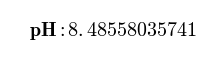

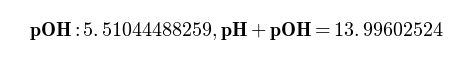

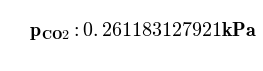

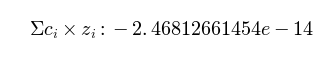

In [3]:
import numpy as np
from scipy import linalg
from scipy.optimize import root, fsolve
eps = np.finfo(float).eps

comps = np.array([
        'H2O', 'H3O(+)', 'HO(-)', 'HCO3(-)', 'Na(+)', 
        'CO3(2-)', 'CO2', 'H2CO3', 'CO2'
    ])

mm = np.array([
        18, 19, 17, 61, 23, 60, 44, 62, 44
    ], dtype=float)

pkw = 13.99602524
mm0 = mm[0]
rho0 = 1.0
ph0 = pkw/2
xw0nahco3 = 0.001
p0n2 = 78.12/(78.12 + 20.96)*101.325
p0o2 = 20.96/(78.12 + 20.96)*101.325

x = np.ones_like(mm)*eps
x[3] = xw0nahco3/(mm[3]+mm[4])/(xw0nahco3/(mm[3]+mm[4])+xw0nahco3/(mm[3]+mm[4])+(1-xw0nahco3)/mm[0])
x[4] = xw0nahco3/(mm[3]+mm[4])/(xw0nahco3/(mm[3]+mm[4])+xw0nahco3/(mm[3]+mm[4])+(1-xw0nahco3)/mm[0])


a = np.array([
        [1 + mm0/rho0*10**(-ph0)/1000.0, mm0/rho0*10**(-ph0)/1000.0],
        [mm0/rho0*10**(ph0-pkw)/1000.0,1 + mm0/rho0*10**(ph0-pkw)/1000.0]
    ])
b = np.array([
        [mm0/rho0*10**(-ph0)/1000.0*(1 - x[3] - x[4])],
        [mm0/rho0*10**(ph0-pkw)/1000.0*(1 - x[3] - x[4])]
    ])

x[1:2+1] = linalg.inv(a).dot(b).flatten()
x[0] = 1 - sum(x[1:])

print 'mole frac.'
print x
print 'mass frac.'
print np.multiply(x, mm)/sum(np.multiply(x, mm))

c0 = np.ones([len(mm)-1,])*eps
c0 = x[:8]/x[0]*rho0/mm0*1000.0
p0co2 = 10**-3.5*101.325 # 10^-3.5atm = 10^-3.5*101.325 kPa
c0[6] = p0co2 / (1670.0 *100) * (sum(c0)-c0[6]) / (1 - p0co2 / (1670.0 *100))
xi = np.ones(5)*eps

x0 = np.append(np.append(c0, p0co2), xi)

def eq_set(x):
    # x, [nh2o, nh30, nho, nhco3, nna, nco3, nco2, nh2co3, pco2,
    #     xi1, xi2, xi3, xi4, xi5]
    c = x[:8]
    xco2 = c[6] / sum(c)
    pco2 = x[8]
    xi = x[9:]
    return np.array([
            1670.0*100*xco2 - pco2, # Hco2 = pco2/xco2
            10**-2.821023053*c[6] - c[7], # 10^-pK2 = ch2co3/cco2
            10**-3.539912399*c[7] - c[1]*c[3], # 10^-pK3 = chco3*ch3o/ch2co3
            10**-10.32991986*c[3] - c[1]*c[5], # 10^-pK4 = cco3*ch3o/chco3
            10**-13.99602524 - c[1]*c[2], # 10^-pKw = ch3o*cho   
            c[0] - c0[0] - (- xi[0] - xi[1] - xi[2] - xi[3] - 2*xi[4]),
            c[1] - c0[1] - (+ xi[2] + xi[3] + xi[4]),
            c[2] - c0[2] - (+ xi[4]),
            c[3] - c0[3] - (+ xi[2] - xi[3]),
            c[4] - c0[4] - (+ 0),
            c[5] - c0[5] - (+ xi[3]),
            c[6] - c0[6] - (- xi[0] - xi[1]),
            c[7] - c0[7] - (+ xi[1] - xi[2]),
            pco2 - p0co2 - (+ xi[0])*8.314*298.15
        ]).T

def jac_eq_set(x):
    j = np.zeros([len(x), len(x)])
    
    c = x[:8]
    xco2 = c[6] / sum(c)
    pco2 = x[8]
    xi = x[9:]
    
    d_f1_dc = np.zeros([9, ])
    
    d_f1_dc[0:6] = 1670.0*100*(-1.0/sum(c)**2)*c[6]
    d_f1_dc[6] = sum([c_ for i, c_ in enumerate(c) if i!=6])/sum(c)**2
    d_f1_dc[7] = 1670.0*100*(-1.0/sum(c)**2)*c[6]
    d_f1_dc[8] = -1.0
    
    j[0, :8+1] = d_f1_dc

    j[1, 6], j[1, 7] = 10**-2.821023053, -1
    j[2, 1], j[2, 3], j[2, 7] = -c[3], -c[1], 10**-3.539912399
    j[3, 1], j[3, 3], j[3, 5] = -c[5], 10**-10.32991986, -c[1]
    j[4, 1], j[4, 2] = -c[2], -c[1]
    for ind in  range(8+1):
        j[ind + 5, ind] = +1
    j[5, 9:14] = np.array([+1, +1, +1, +1, +2])
    j[6, 11:14] = np.array([-1, -1, -1])
    j[7, 13] = -1
    j[8, 11:13] = np.array([-1, +1])
    j[10, 12] = -1
    j[11, 9:11] = +1
    j[12, 10:12] = np.array([-1, +1])
    j[13, 9] = -1*8.314*298.15
    
    return j

#res = root(eq_set, x0, jac=jac_eq_set, tol=1e-10)
res = root(eq_set, x0, jac=False, tol=1e-10)
#res = root(eq_set, x0, method='broyden1', jac=jac_eq_set, tol=1e-10, options={'line_search': 'wolfe'})
#res = root(eq_set, res.x, jac=False, tol=1e-12, method='broyden1')
for item in res.keys():
    if item not in ['qtf', 'r', 'jac', 'fjac']:
        print str(item) + ': ' + str(getattr(res, str(item)))
print '||f||: ' + str(np.sqrt(res.fun.T.dot(res.fun)))
print ''
print_latex('\\bf{pH}: ' + str(-np.log10(res.x[1])))
print_latex('\\bf{pOH}: ' + str(-np.log10(res.x[2])) + \
            ', pH+pOH=' + str(-np.log10(res.x[1])+-np.log10(res.x[2])))
print_latex('\\bf{p_{CO2}}:' + str(res.x[8]) + ' kPa')
print_latex('\\Sigma{c_i\\times z_i}:' + \
            str(res.x[1]-res.x[2]-res.x[3]+res.x[4]-2*res.x[5]))

In [4]:
jac_eq_set(res.x)[-1]

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
        -2.47881910e+03,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00])

In [5]:
print 'x0'
for index, num in enumerate(x0):
    if index < 8:
        print 'C' + str(index) + '=' + '%.20e' % num + ','
    elif index == 8:
        print 'pco2' + '=' + '%.20e' % num + ','
    else:
        print 'x' + str(index-9) + '=' + '%.20e' % num + ','

x0
C0=5.55555555555555500291e+01,
C1=1.00458659795015562355e-07,
C2=1.00458659795015575590e-07,
C3=1.19166786264420683505e-02,
C4=1.19166786264420683505e-02,
C5=1.23411034977318318904e-14,
C6=1.06638491665527950045e-05,
C7=1.23411034977318318904e-14,
pco2=3.20417783916561033086e-02,
x0=2.22044604925031308085e-16,
x1=2.22044604925031308085e-16,
x2=2.22044604925031308085e-16,
x3=2.22044604925031308085e-16,
x4=2.22044604925031308085e-16,


In [6]:
print 'x:'
for index, num in enumerate(res.x):
    if index < 8:
        print 'C' + str(index) + '=' + '%.20e' % num + ','
    elif index == 8:
        print 'pco2' + '=' + '%.20e' % num + ','
    else:
        print 'x' + str(index-9) + '=' + '%.20e' % num + ','

x:
C0=5.55556289267577199098e+01,
C1=3.26903554347567655169e-09,
C2=3.08713141646693843776e-06,
C3=1.15820991613138461751e-02,
C4=1.19166786264420683505e-02,
C5=1.65747801385990306934e-04,
C6=8.69245344681667691557e-05,
C7=1.31256046958327811330e-07,
pco2=2.61183127920939117672e-01,
x0=9.24397224183414839517e-05,
x1=-1.68700407719955461491e-04,
x2=-1.68831663754572664209e-04,
x3=1.65747801373649213076e-04,
x4=2.98667275667192327245e-06,


||f||: 5.26579303209e-13


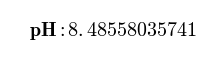

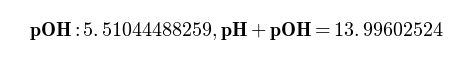

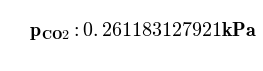

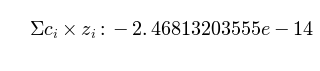

In [7]:
from numerik import nr_ls
import logging

logger = logging.getLogger()
fhandler = logging.FileHandler(filename='./logs/CO2_Equilibria.log')
formatter = logging.Formatter('%(asctime)s;%(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.DEBUG)

def notify_status_func(progress_k, stop_value, k,
                       j_it_backtrack, lambda_ls, accum_step,
                       x, diff, f_val, j_val, lambda_ls_y,
                       method_loops):
    g_min = np.nan
    g1 = np.nan
    y = lambda_ls_y
    pr_str =';k=' + str(k) + \
            ';backtrack=' + str(j_it_backtrack) + \
            ';lambda_ls=' + str(lambda_ls) + \
            ';accum_step=' + str(accum_step) + \
            ';stop=' + str(stop_value) + \
            ';X=' + '[' + ','.join(map(str, x.T.A1)) + ']' + \
            ';||X(k)-X(k-1)||=' + str((diff.T * diff).item()) + \
            ';f(X)=' + '[' + ','.join(map(str, f_val.T.A1)) + ']' + \
            ';||f(X)||=' + str(np.sqrt((f_val.T * f_val).item())) + \
            ';j(X)=' + str(j_val.tolist()) + \
            ';Y=' + '[' + ','.join(map(str, y.T.A1)) + ']' + \
            ';||Y||=' + str(np.sqrt((y.T * y).item())) + \
            ';g=' + str(g_min) + \
            ';|g-g1|=' + str(abs(g_min - g1))
    logging.debug(pr_str)

progress_k, stop, outer_it_k, outer_it_j, \
        lambda_ls, accum_step, x, \
        diff, f_val, lambda_ls_y, \
        method_loops = \
        nr_ls(x0=np.matrix(x0).T,
              f=lambda x: np.matrix(eq_set(x)).T,
              j=lambda x: np.matrix(jac_eq_set(x)),
              tol=1e-12,
              max_it=1000,
              inner_loop_condition=lambda x_vec:
              all([item >= 0 for item in
                   x_vec[0:9]]),
              notify_status_func=notify_status_func,
              method_loops=[0, 0],
              process_func_handle=None)

x = x.A1
x_nrls = x
f_val = f_val.A1
        
print '||f||: ' + str(np.sqrt(f_val.T.dot(f_val)))
print_latex('\\bf{pH}: ' + str(-np.log10(x[1])))
print_latex('\\bf{pOH}: ' + str(-np.log10(x[2])) + \
            ', pH+pOH=' + str(-np.log10(x[1])+-np.log10(x[2])))
print_latex('\\bf{p_{CO2}}:' + str(x[8]) + ' kPa')
print_latex('\\Sigma{c_i\\times z_i}:' + \
            str(x[1]-x[2]-x[3]+x[4]-2*x[5]))

In [8]:
print 'x:'
for index, num in enumerate(x):
    if index < 8:
        print 'C' + str(index) + '=' + '%.20e' % num + ','
    elif index == 8:
        print 'pco2' + '=' + '%.20e' % num + ','
    else:
        print 'x' + str(index-9) + '=' + '%.20e' % num + ','

x:
C0=5.55556289267577199098e+01,
C1=3.26903554347370165798e-09,
C2=3.08713141646874939420e-06,
C3=1.15820991613136553555e-02,
C4=1.19166786264420683505e-02,
C5=1.65747801386084876469e-04,
C6=8.69245344681143479806e-05,
C7=1.31256046958248640219e-07,
pco2=2.61183127921308211317e-01,
x0=9.24397224184903584625e-05,
x1=-1.68700407720051901274e-04,
x2=-1.68831663754669049782e-04,
x3=1.65747801373743782610e-04,
x4=2.98667275667373380537e-06,


||f||: 9.30177331348e-15


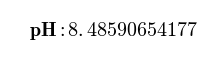

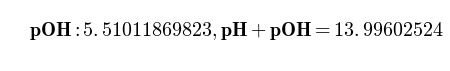

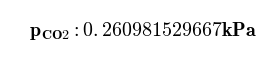

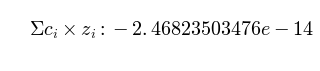

In [9]:
def eq_set_const_p(x):
    # x, [nh2o, nh30, nho, nhco3, nna, nco3, nco2, nh2co3, pco2,
    #     xi1, xi2, xi3, xi4, xi5]
    c = x[:8]
    xco2 = c[6] / sum(c)
    pco2 = x[8]
    xi = x[9:]
    f = eq_set(x)[0][0]
    f[13] = pco2 - p0co2 * (101.325 - pco2) / (p0n2 + p0o2) - \
        (+ xi[0])*8.314*298.15 * \
        (101.325 - pco2) / (p0n2 + p0o2)
    return f

def jac_eq_set_const_p(x):
    #if type(x) == np.matrixlib.defmatrix.matrix:
    #    x = x.A1
    j = jac_eq_set(x)
    
    c = x[:8]
    xco2 = c[6] / sum(c)
    pco2 = x[8]
    xi = x[9:]
    j[13, 8] = +p0co2 / (p0n2 + p0o2) +1 + \
                xi[0]*8.314*298.15 / (p0n2 + p0o2)
    j[13, 9] = -1*8.314*298.15 * \
                        (101.325 - pco2) / (p0n2 + p0o2)
    
    return j

progress_k, stop, outer_it_k, outer_it_j, \
        lambda_ls, accum_step, x, \
        diff, f_val, lambda_ls_y, \
        method_loops = \
        nr_ls(x0=np.matrix(x0).T,
              f=lambda x: np.matrix(eq_set_const_p(x)).T,
              j=lambda x: np.matrix(jac_eq_set_const_p(x)),
              tol=1e-14,
              max_it=1000,
              inner_loop_condition=lambda x_vec:
              all([item >= 0 for item in
                   x_vec[0:9]]),
              notify_status_func=notify_status_func,
              method_loops=[0, 0],
              process_func_handle=None)

x = x.A1
f_val = f_val.A1
        
print '||f||: ' + str(np.sqrt(f_val.T.dot(f_val)))
print_latex('\\bf{pH}: ' + str(-np.log10(x[1])))
print_latex('\\bf{pOH}: ' + str(-np.log10(x[2])) + \
            ', pH+pOH=' + str(-np.log10(x[1])+-np.log10(x[2])))
print_latex('\\bf{p_{CO2}}:' + str(x[8]) + ' kPa')
print_latex('\\Sigma{c_i\\times z_i}:' + \
            str(x[1]-x[2]-x[3]+x[4]-2*x[5]))

In [10]:
print 'x:'
for index, num in enumerate(x):
    if index < 8:
        print 'C' + str(index) + '=' + '%.20e' % num + ','
    elif index == 8:
        print 'pco2' + '=' + '%.20e' % num + ','
    else:
        print 'x' + str(index-9) + '=' + '%.20e' % num + ','

x:
C0=5.55556288573462069280e+01,
C1=3.26658119977462851513e-09,
C2=3.08945093068769620858e-06,
C3=1.15818547703952275801e-02,
C4=1.19166786264420683505e-02,
C5=1.65868835861017477210e-04,
C6=8.68574400135927127348e-05,
C7=1.31154734331989375668e-07,
pco2=2.60981529667272171835e-01,
x0=9.26302746291334932072e-05,
x1=-1.68823865476173414326e-04,
x2=-1.68955020198164305740e-04,
x3=1.65868835848676383351e-04,
x4=2.98899227089268061975e-06,


In [11]:
-np.log10(8.14830419834e-11)

10.088932765975949

In [1]:
299792458/346.13

866126.767399532

In [3]:
1/(1/0.34613-1/299792.458)

0.3461303996301842